## PART 02: TELCO CUSTOMER CHURN ANALYSIS

### A technical test given to job applicants by Arab Bank for the Data Scientist position.
#### Author: GREJELL B. SEGURA
#### Date: August 04, 2020

### NOTE:  
#### This notebook is the continuation of the Churn Analysis. This covers the initial training of models, feature engineering and model selection.

In [1]:
import pandas as pd
import numpy as np
import os

from pycaret.classification import *

In [2]:
os.chdir(r'/home/grejell/Projects/arab-bank-test-churn-analysis')
X_train = pd.read_pickle('./data/X_train.pkl')
Y_train = pd.read_pickle('./data/Y_train.pkl')
x_test = pd.read_pickle('./data/x_test.pkl')
y_test = pd.read_pickle('./data/y_test.pkl')
data = pd.read_pickle('./data/cleanData.pkl')
data.rename({'Churn_Yes':'target'}, axis=1, inplace=True)

# 1. Model Comparison and Base Model Selection

Below are the models ran in pycaret.  
These models are not yet tuned.  
It has been cross validated within 5 folds.  
It is sorted based on the highest AUC.

In [3]:
clf1 = setup(data, target = 'target')

best1 = compare_models(sort='AUC', whitelist=['dt','rf','xgboost','lightgbm','ada','lr','nb'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8021,0.8448,0.5497,0.6518,0.5961,0.4663,0.4695,0.0575
1,Ada Boost Classifier,0.8017,0.8413,0.5367,0.6550,0.5898,0.4608,0.4648,0.2453
2,Light Gradient Boosting Machine,0.7932,0.8320,0.5306,0.6331,0.5770,0.4415,0.4448,0.1426
3,Extreme Gradient Boosting,0.7830,0.8186,0.4977,0.6143,0.5495,0.4087,0.4129,0.7647
4,Naive Bayes,0.6942,0.8185,0.8448,0.4593,0.5950,0.3823,0.4283,0.0063
5,Random Forest Classifier,0.7792,0.7952,0.4503,0.6159,0.5199,0.3810,0.3891,0.1110
6,Decision Tree Classifier,0.7363,0.6627,0.5023,0.5050,0.5030,0.3238,0.3241,0.0279


The top models include GBM, Logistic Regression, Adaboost, Catboost and LDA.

The data is imbalanced with around 73.4% for YES while NO is 26.6%.  
For this reason, it is recommendable to balance the data.  
This will improve the performance of the models.  
Pycaret utilizes the oversampling method called SMOTE to balance the data during training.

In [4]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
best2 = compare_models(sort='AUC', whitelist=['dt','rf','xgboost','lightgbm','ada','lr','nb'], fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.7690,0.8428,0.7377,0.5484,0.6288,0.4663,0.4776,0.3885
1,Logistic Regression,0.7916,0.8387,0.6177,0.6061,0.6111,0.4689,0.4694,0.0612
2,Light Gradient Boosting Machine,0.7759,0.8236,0.5718,0.5795,0.5750,0.4230,0.4234,0.1821
3,Naive Bayes,0.7007,0.8153,0.8219,0.4645,0.5933,0.3843,0.4241,0.0073
4,Extreme Gradient Boosting,0.7708,0.8122,0.5565,0.5704,0.5623,0.4074,0.4081,1.1917
5,Random Forest Classifier,0.7674,0.7882,0.5283,0.5671,0.5470,0.3907,0.3912,0.1114
6,Decision Tree Classifier,0.7247,0.6698,0.5527,0.4849,0.5159,0.3249,0.3267,0.0431


After balancing the data, the top models now are now, Adaboost, GBM, Logistic Regression, Catboost, and LDA.  
We will now tune the models 1 by 1.  
We will include LGBM and XGBoost as top models for the reason that these algorithms are known to perform better when tuned.  
There are 7 models to tune, after that we will select the best among these models.

# 2. Hyperparameter Tuning

Pycaret employs random grid search from scikitlearn to select the best parameters.  
The number of iterations determine the total number of combination it will randomly select.  
The combination with the highest AUC will be selected as the best parameters.  
In addition, this iterations will be done with a cross validation in 5 folds.  
The algorithm also alots 30% of data as hold out intended for testing.

# 2.1 Adaboost

In [5]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
ada = create_model('ada')
tuned_ada = tune_model(ada, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7482,0.8459,0.8092,0.5171,0.6310,0.4536,0.4798
1,0.7533,0.8467,0.8092,0.5235,0.6357,0.4619,0.4869
2,0.7561,0.8529,0.7816,0.5271,0.6296,0.4579,0.4776
3,0.7439,0.8560,0.8276,0.5106,0.6316,0.4517,0.4827
4,0.7266,0.8300,0.7863,0.4916,0.6050,0.4125,0.4391
Mean,0.7456,0.8463,0.8028,0.5140,0.6266,0.4475,0.4732
SD,0.0104,0.0090,0.0168,0.0125,0.0110,0.0179,0.0173


After tuning, the AUC was not improved. But recall, accuracy and precision were improved.

In [6]:
plot_model(tuned_ada, plot = 'parameter')

,Parameters
algorithm,SAMME
base_estimator,None
learning_rate,0.36
n_estimators,195
random_state,6979


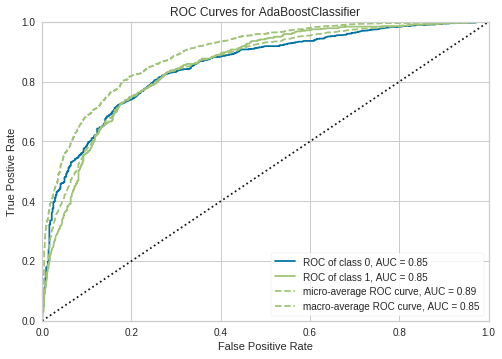

In [7]:
plot_model(tuned_ada, plot='auc')

In [8]:
predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8081,0.8507,0.5276,0.6789,0.5938,0.4707,0.4771


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,target,Label,Score
0,-0.302393,-1.464182,-0.787035,0,1,1,0,1,0,0,...,1,0,0,0,1,1.0,0.0,0,0,0.3380
1,0.105047,-1.469168,-0.674708,0,1,1,0,1,0,0,...,0,1,0,0,0,1.0,0.0,0,0,0.3547
2,-0.017185,-0.471955,-0.277882,0,1,0,1,0,1,1,...,0,0,1,0,0,1.0,0.0,0,0,0.4440
3,-0.709833,0.949074,-0.370002,0,1,1,0,1,0,0,...,1,0,0,1,0,1.0,0.0,1,1,0.5253
4,0.919926,-0.340655,0.306625,0,1,0,1,1,0,1,...,1,1,0,0,0,1.0,0.0,1,0,0.4432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,-1.198760,0.330802,-0.902317,1,0,1,0,1,0,0,...,1,0,0,0,1,1.0,0.0,0,1,0.5148
2106,-1.198760,-0.013237,-0.921045,0,1,1,0,1,0,0,...,1,0,1,0,0,1.0,0.0,0,0,0.4629
2107,-1.158016,0.892565,-0.846154,1,0,0,1,1,0,0,...,1,0,0,1,0,1.0,0.0,1,1,0.5301
2108,-0.750577,-0.003264,-0.592206,1,0,0,1,1,0,0,...,1,1,0,0,0,1.0,0.0,1,0,0.4646


# 2.2 Light GBM

In [10]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lgb = create_model('lightgbm')
tuned_lgb = tune_model(lgb, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7929,0.8499,0.6565,0.6014,0.6277,0.4847,0.4856
1,0.7807,0.8387,0.6450,0.5788,0.6101,0.4582,0.4595
2,0.7886,0.8391,0.6360,0.5950,0.6148,0.4694,0.4699
3,0.7866,0.8334,0.6475,0.5889,0.6168,0.4694,0.4704
4,0.7947,0.8399,0.6336,0.6103,0.6217,0.4809,0.4811
Mean,0.7887,0.8402,0.6437,0.5949,0.6182,0.4725,0.4733
SD,0.0049,0.0054,0.0083,0.0107,0.0060,0.0094,0.0092


In [11]:
plot_model(tuned_lgb, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,60
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.3
n_estimators,90


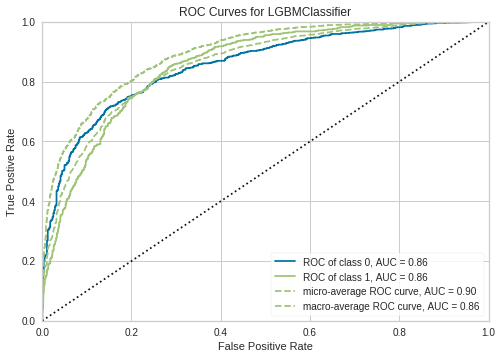

In [12]:
plot_model(tuned_lgb, plot='auc')

In [13]:
predict_model(tuned_lgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8009,0.8552,0.4973,0.6691,0.5706,0.4446,0.4529


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,target,Label,Score
0,0.105047,-1.297980,-0.617994,1,0,0,1,0,1,0,...,1,0,0,1,0,1.0,0.0,0,0,0.0892
1,0.634718,1.136883,1.085784,0,1,1,0,1,0,0,...,1,0,0,1,0,0.0,1.0,0,0,0.3574
2,-1.239504,-0.668073,-0.966024,0,1,1,0,1,0,0,...,1,0,0,1,0,0.0,1.0,1,1,0.6114
3,1.612573,1.306409,2.278468,0,1,0,1,0,1,0,...,1,0,1,0,0,0.0,1.0,0,0,0.0170
4,1.368109,-0.031519,0.874125,0,1,0,1,1,0,0,...,0,0,0,1,0,1.0,0.0,0,0,0.1322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,-0.302393,-0.988844,-0.634803,1,0,1,0,0,1,1,...,0,1,0,0,0,1.0,0.0,0,0,0.0327
2106,-0.057929,1.314719,0.406907,1,0,1,0,1,0,0,...,0,0,0,1,0,1.0,0.0,0,0,0.4317
2107,-0.832064,0.297562,-0.622913,0,1,1,0,0,1,0,...,1,0,1,0,0,1.0,0.0,1,0,0.4152
2108,0.349510,-0.977209,-0.384230,1,0,0,1,0,1,1,...,0,0,1,0,0,1.0,0.0,0,0,0.0338


# 2.3 XGBoost

In [ ]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
xgb = create_model('xgboost')
tuned_xgb = tune_model(xgb, optimize = 'AUC', n_iter = 50, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7424,0.7863,0.4809,0.5164,0.4980,0.3251,0.3254
1,0.7830,0.8173,0.5802,0.5938,0.5869,0.4397,0.4398
2,0.8293,0.8647,0.7154,0.6643,0.6889,0.5715,0.5722
3,0.7764,0.8271,0.5923,0.5746,0.5833,0.4306,0.4307
4,0.7581,0.8217,0.5191,0.5484,0.5333,0.3703,0.3705
5,0.7683,0.8111,0.5496,0.5669,0.5581,0.4012,0.4013
6,0.7886,0.8435,0.5344,0.6195,0.5738,0.4342,0.4363
7,0.7764,0.8186,0.5649,0.5827,0.5736,0.4222,0.4223
8,0.7561,0.8018,0.5496,0.5414,0.5455,0.3788,0.3788
9,0.7744,0.8020,0.5725,0.5769,0.5747,0.4212,0.4212


IntProgress(value=0, description='Processing: ', max=11)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:34:24
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [ ]:
plot_model(tuned_xgb, plot = 'parameter')

In [ ]:
plot_model(tuned_xgb, plot='auc')

In [ ]:
predict_model(tuned_xgb)